In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/IITJPGD/MLOpsAssignment2/main/indian_liver_patientmissing.csv"
df = pd.read_csv(url)
print(df.head())
print(df.info())
print(df.describe())

   Age  Gender Total_Bilirubin Direct_Bilirubin Alkaline_Phosphotase  \
0   65  Female             0.7              0.1                  187   
1   62    Male            10.9              5.5                  699   
2   62    Male             7.3              4.1                  490   
3   58    Male               1              0.4                  182   
4   72    Male             3.9                2                  195   

  Alamine_Aminotransferase Aspartate_Aminotransferase Total_Protiens  Albumin  \
0                       16                         18            6.8      3.3   
1                       64                        100            7.5      3.2   
2                       60                         68              7      3.3   
3                       14                         20            6.8      3.4   
4                       27                         59            7.3      2.4   

   Albumin_and_Globulin_Ratio  LiverPateientOrNot 1meansNO  
0                  

In [8]:
# Function to identify discrete and continuous variables
def check_variable_types(data, threshold=10):
    discrete_values = []
    continuous_values = []

    for col in data.columns:
        unique_values = data[col].nunique()
        if unique_values <= threshold:
            discrete_values.append(col)
        else:
            continuous_values.append(col)

    return discrete_values, continuous_values

# Set a threshold for the number of unique values
threshold_value = 10
discrete_vars_g23ai2100, continuous_vars_g23ai2100 = check_variable_types(df, threshold_value)

print("Discrete Variables:", discrete_vars_g23ai2100)
print("Continuous Variables:", continuous_vars_g23ai2100)

Discrete Variables: ['Gender', 'LiverPateientOrNot 1meansNO']
Continuous Variables: ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']


In [9]:
df['Gender'] = df['Gender'].replace(['', None], 'Male')  # Assuming default is 'Male' # Step 1: Replace empty or missing value


gender_map_g23ai2113 = {'Male': 1, 'Female': 0} # Step 2: Map gender to integers
df['Gender'] = df['Gender'].map(gender_map_g23ai2113)

object_columns_g23ai2113 = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                  'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens']

for col in object_columns_g23ai2113:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# missing values count
print(df.isnull().sum())

# Impute missing values
df.fillna(df.mean(), inplace=True)  # For continuous columns
df.fillna(df.mode().iloc[0], inplace=True)  # For discrete columns


Age                            0
Gender                         0
Total_Bilirubin                3
Direct_Bilirubin               4
Alkaline_Phosphotase           1
Alamine_Aminotransferase       3
Aspartate_Aminotransferase     3
Total_Protiens                 2
Albumin                        0
Albumin_and_Globulin_Ratio     4
LiverPateientOrNot 1meansNO    0
dtype: int64


Q4 Q4 Do exploratory analysis by different visualizations

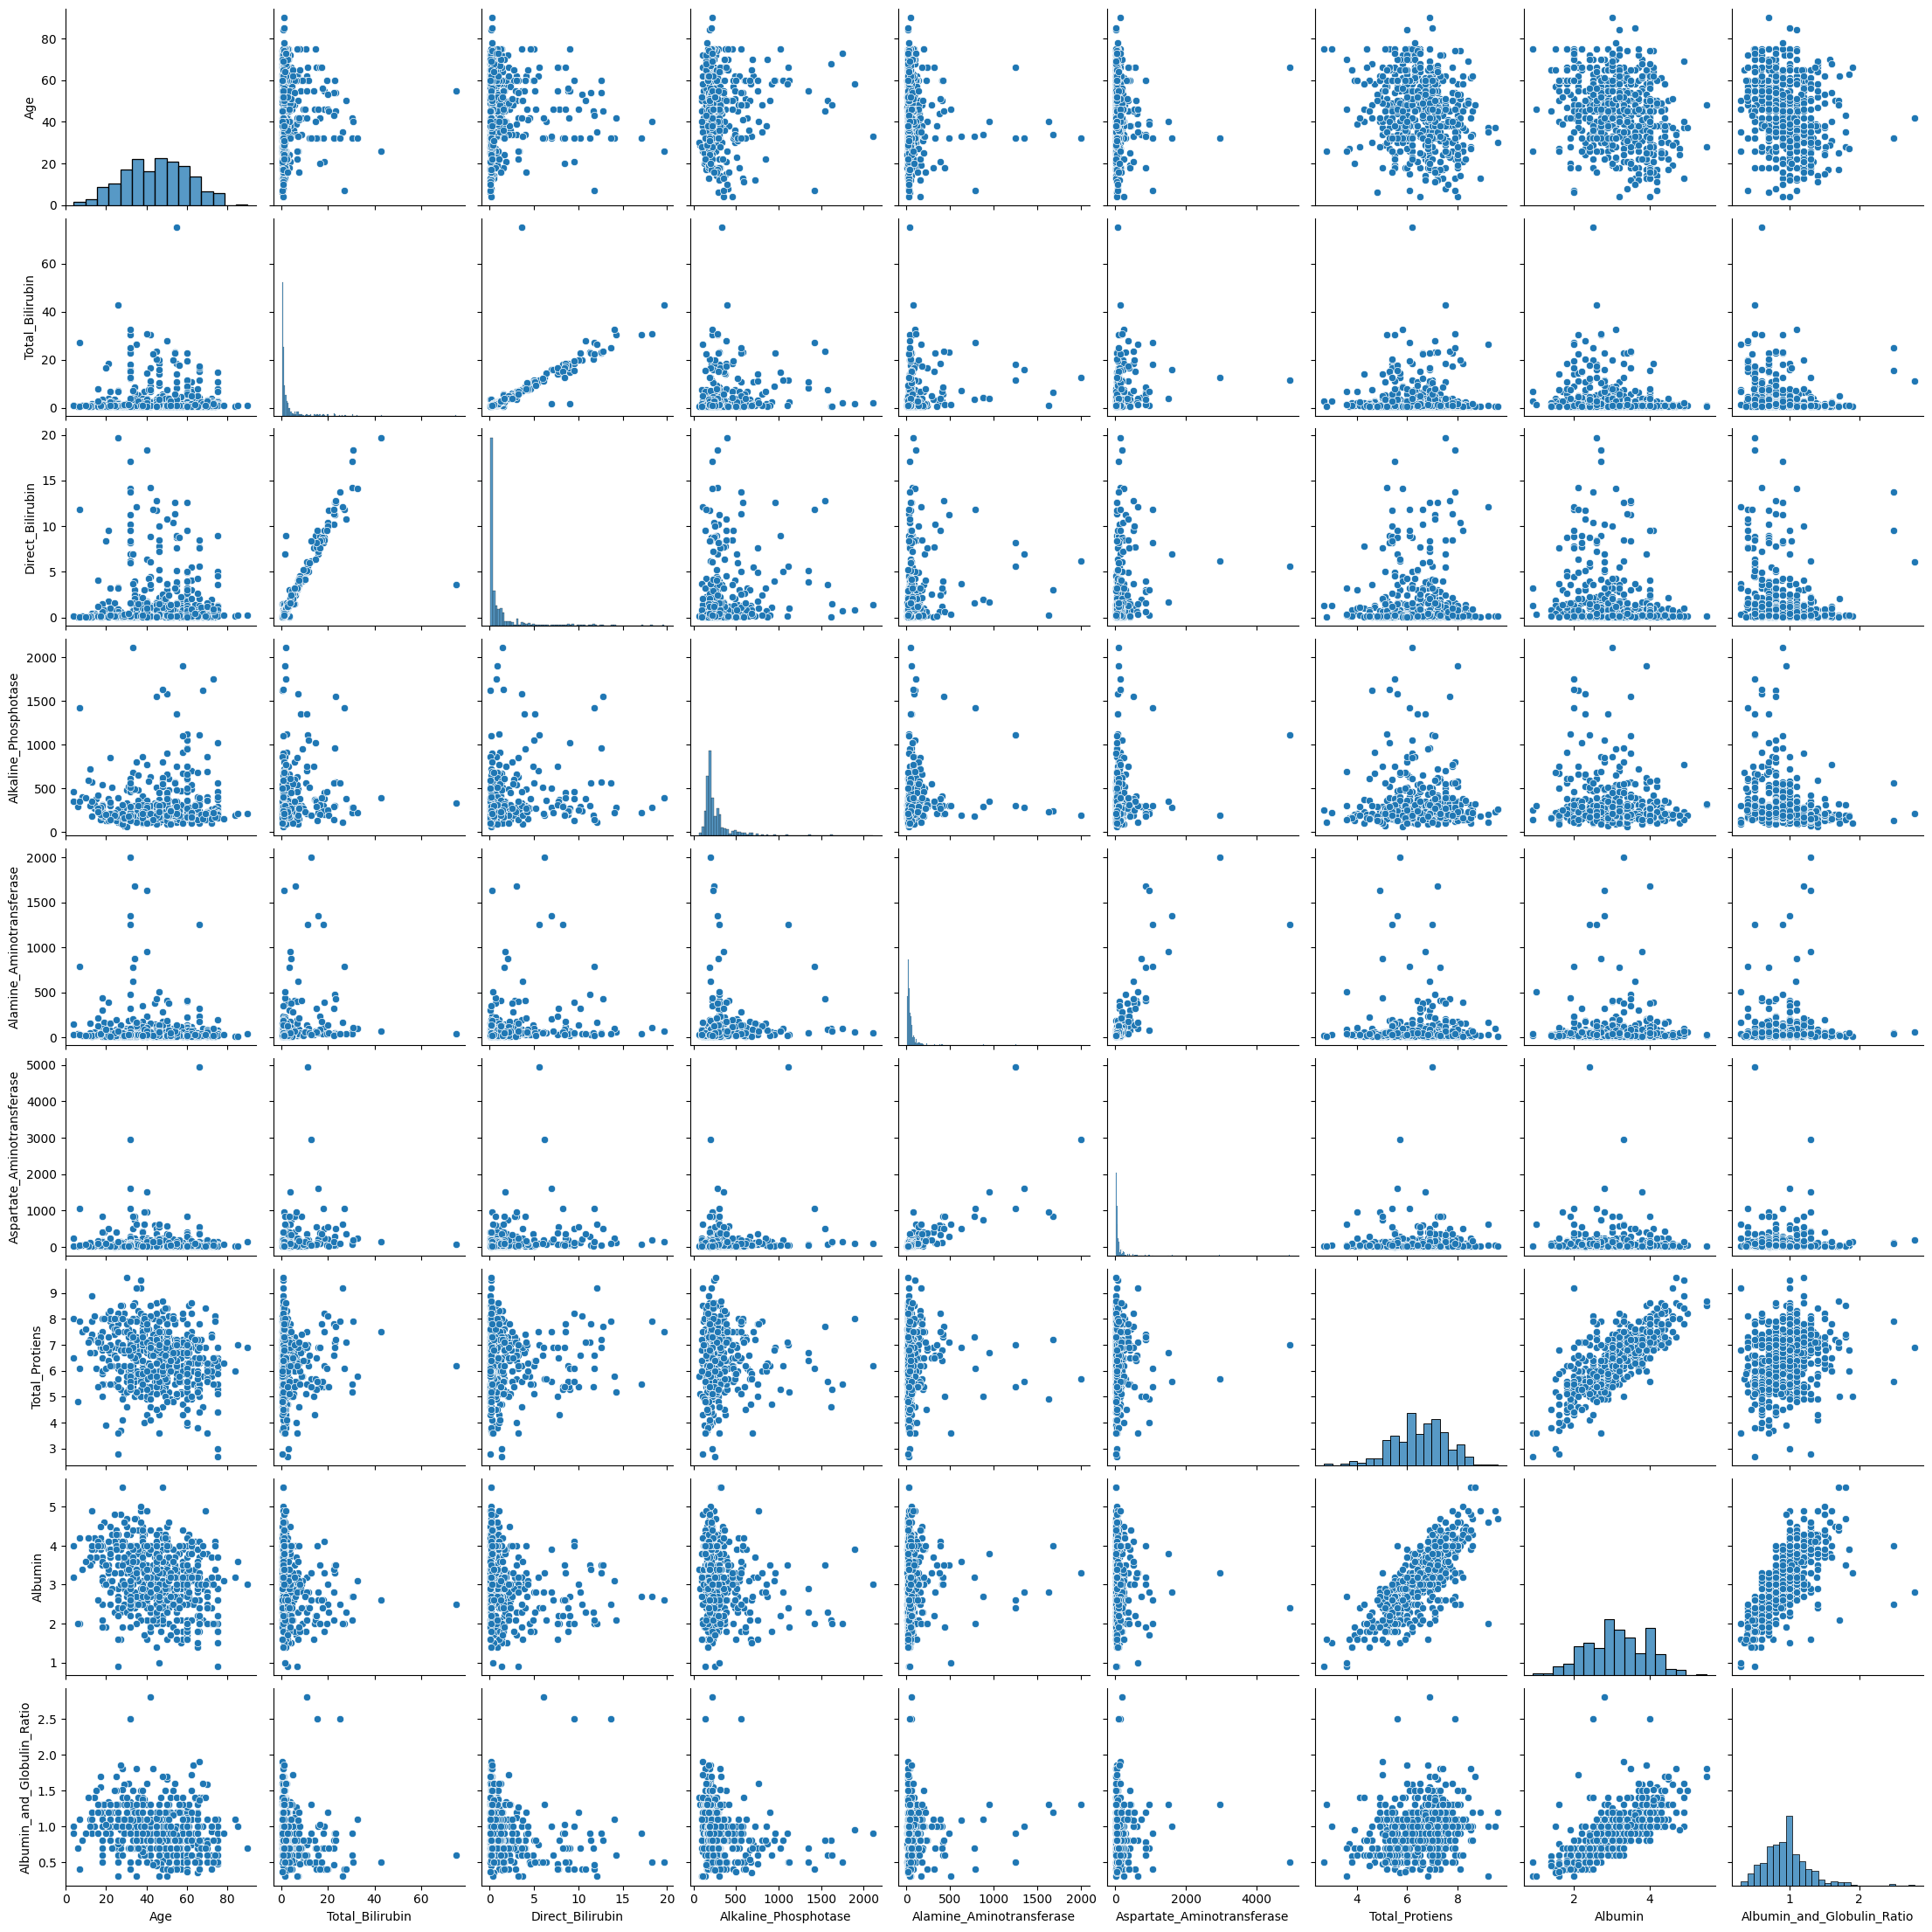

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for continuous variables
sns.pairplot(df[continuous_vars_g23ai2100])
plt.show()

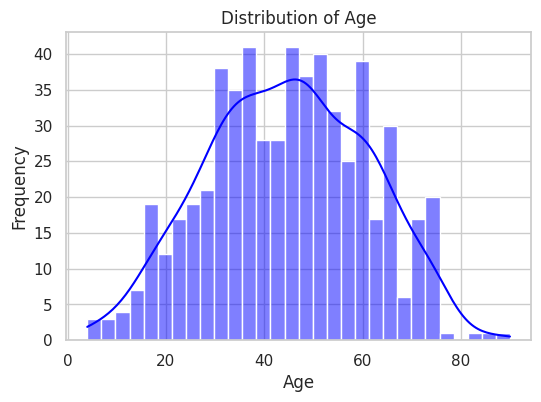

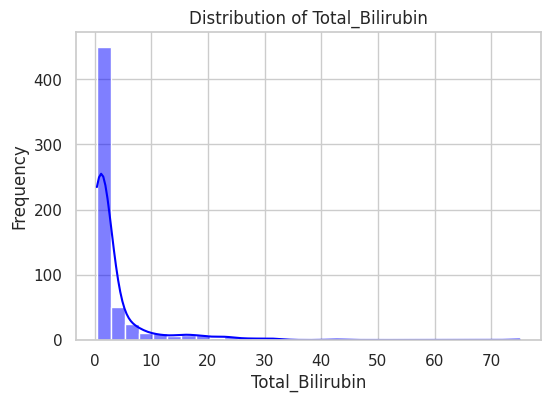

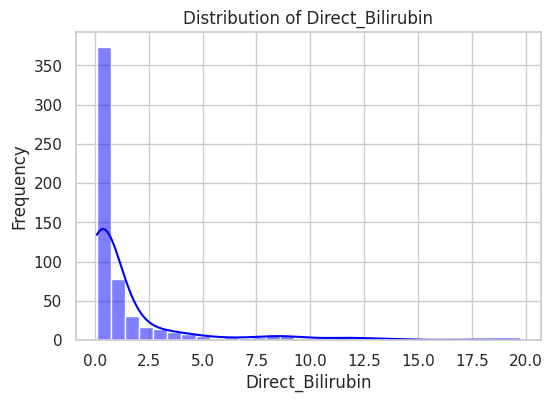

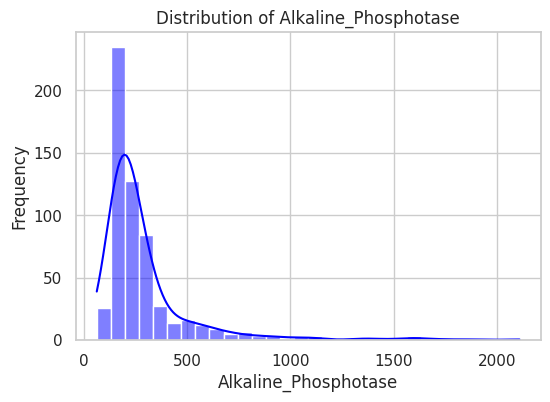

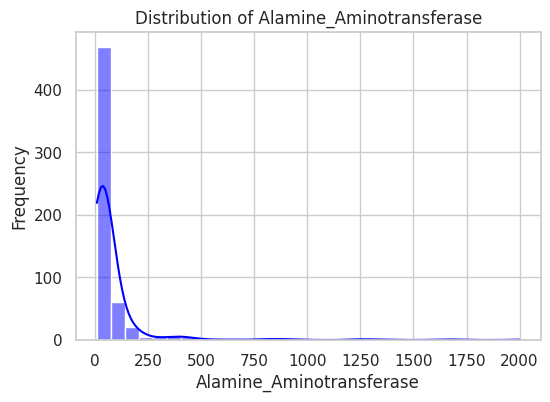

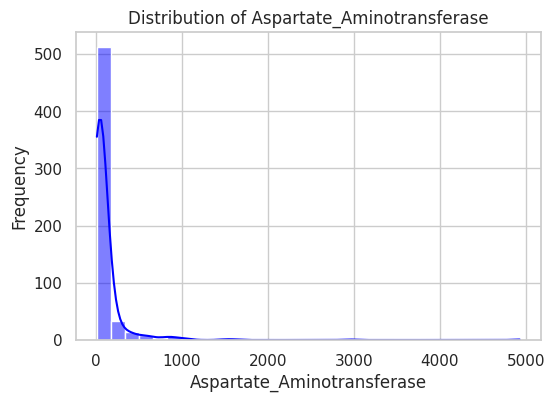

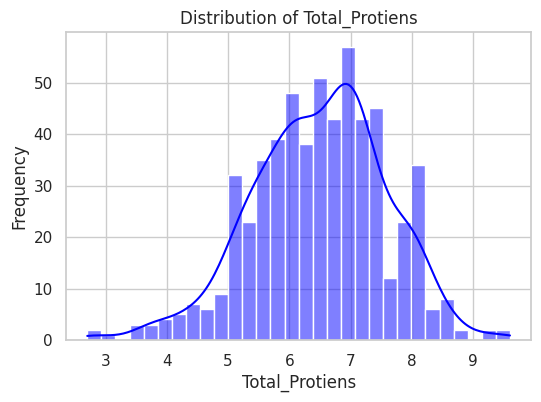

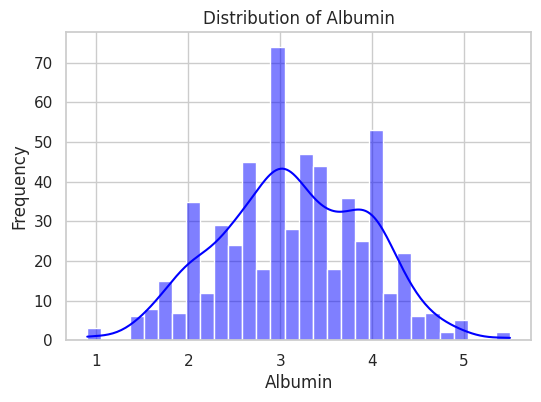

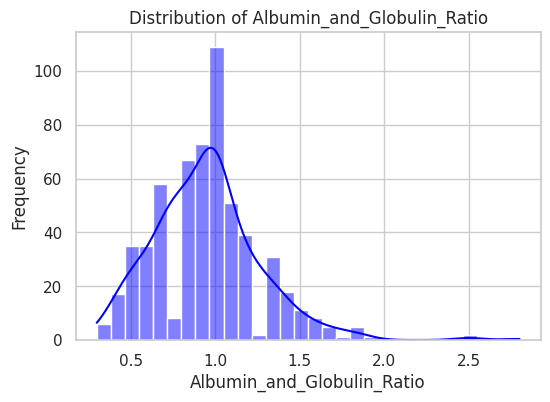

In [11]:

# Set visualization style
sns.set(style="whitegrid")
#  Visualize the distribution of continuous variables

for col in continuous_vars_g23ai2100:
  plt.figure(figsize=(6, 4))
  sns.histplot(df[col], kde=True, bins=30, color='blue')
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

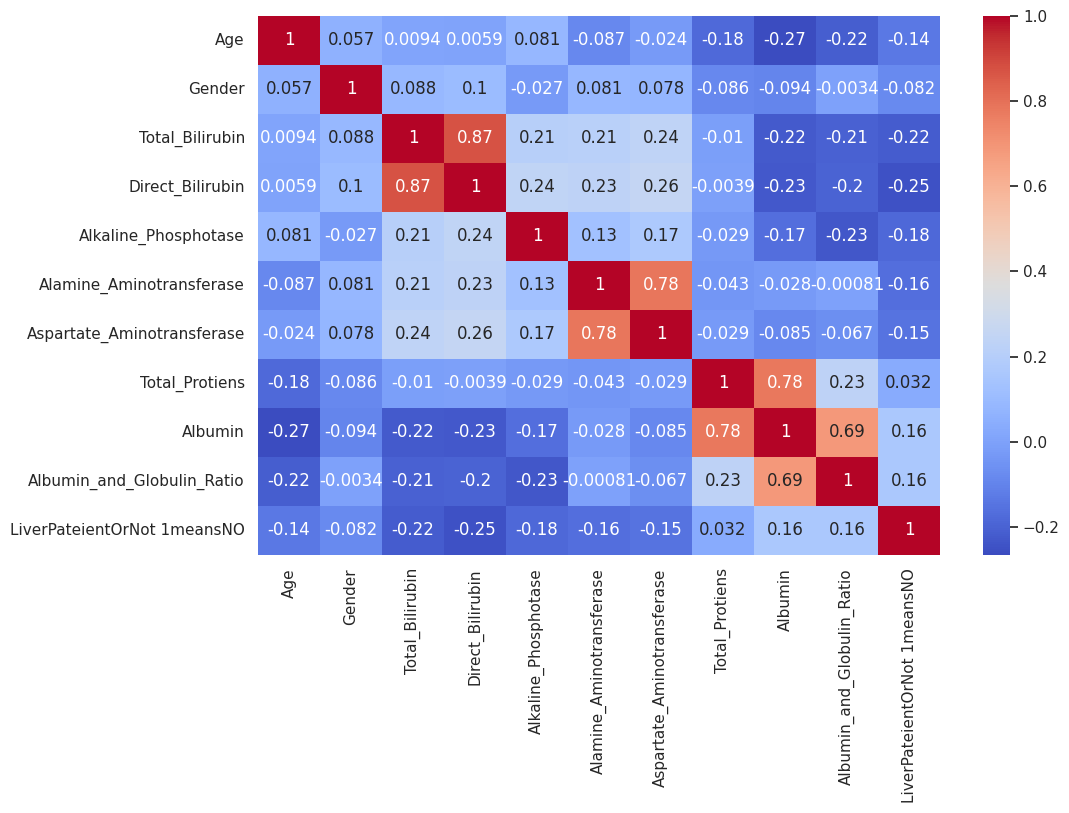

In [12]:
# ------------- Correlation heatmap ------
plt.figure(figsize=(11, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

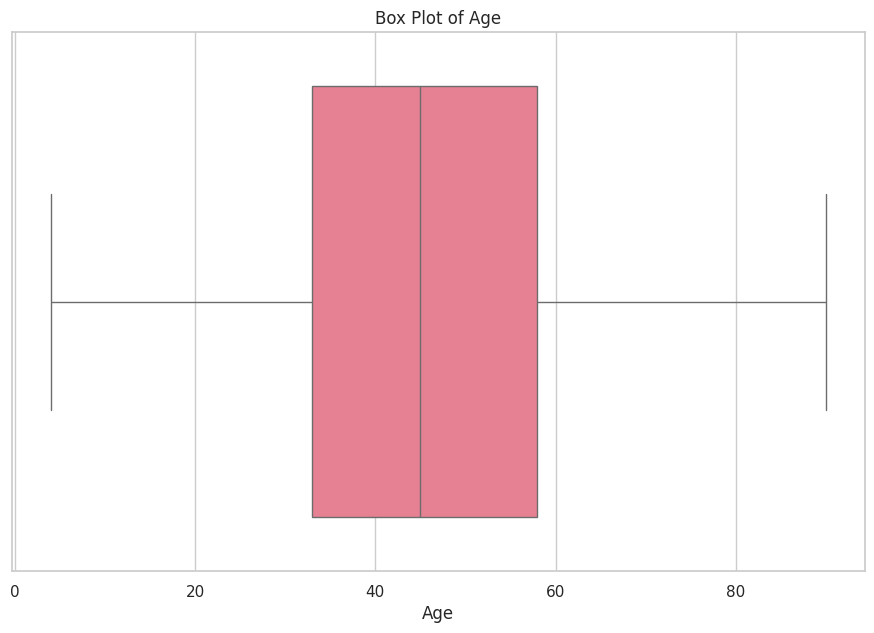

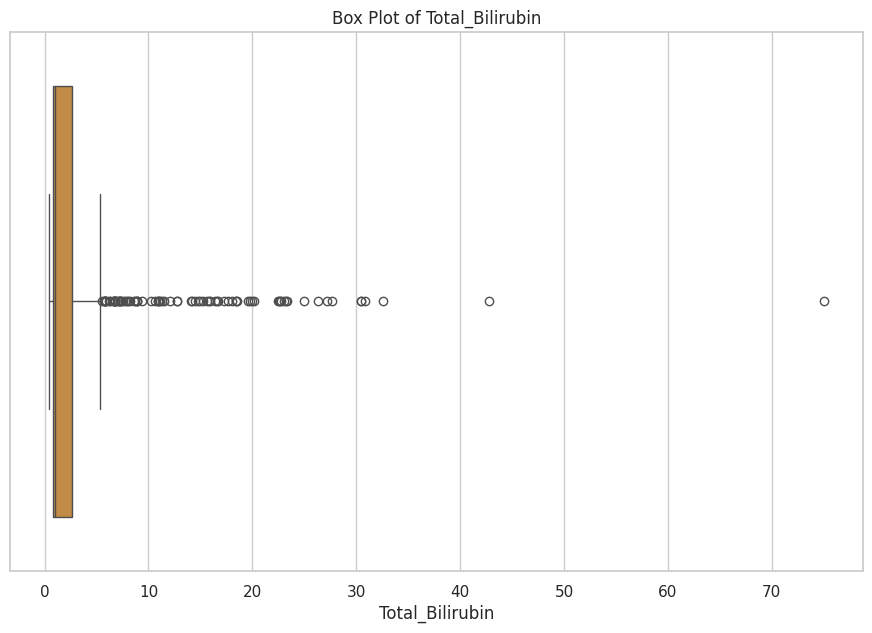

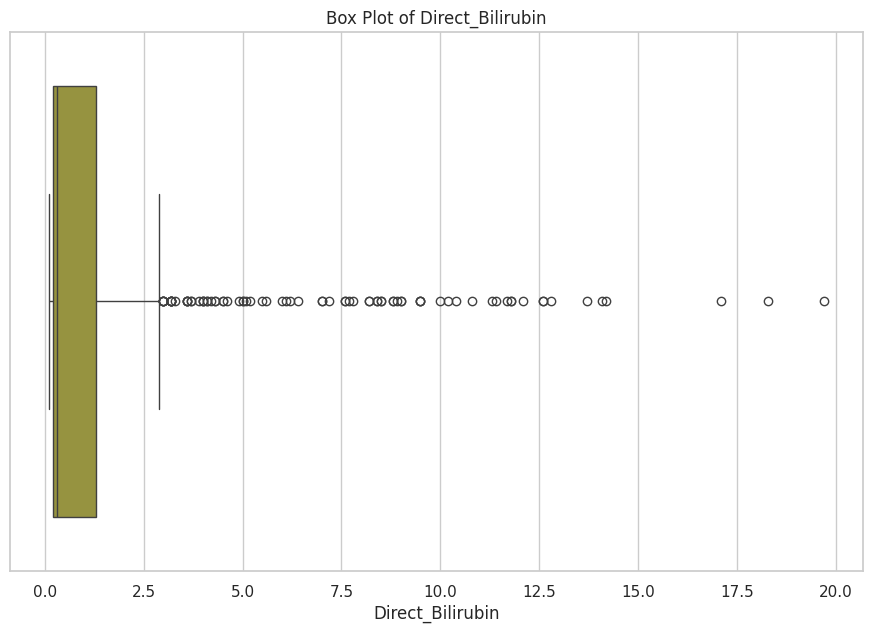

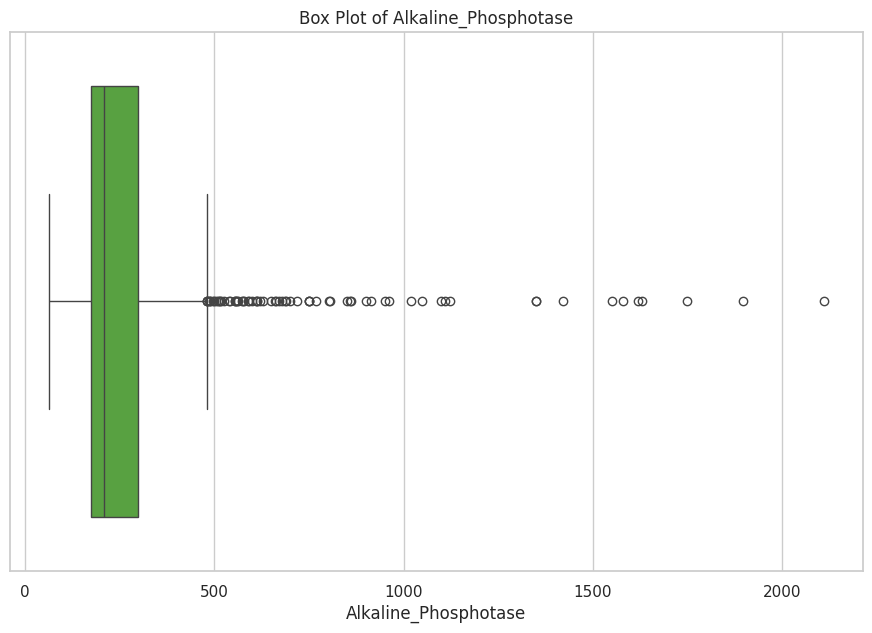

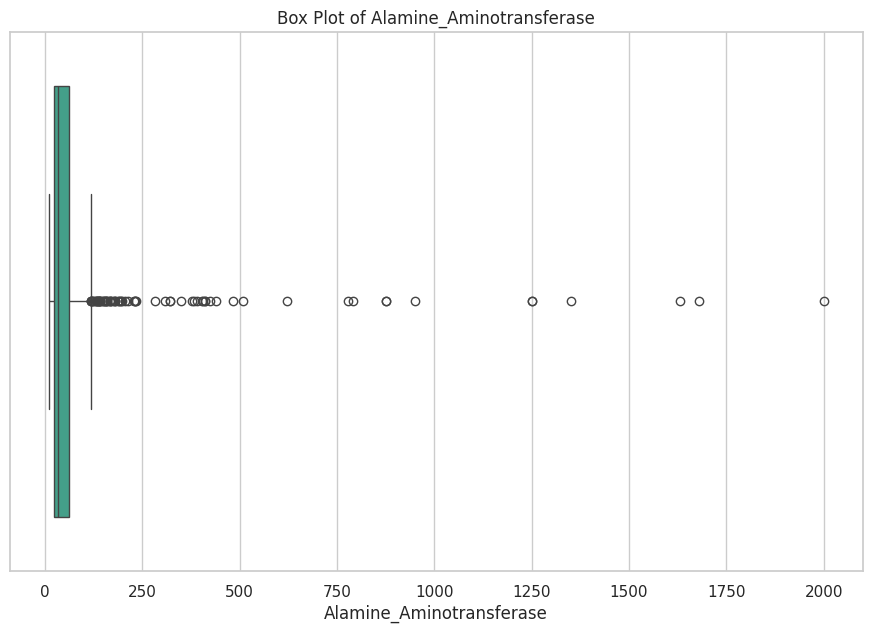

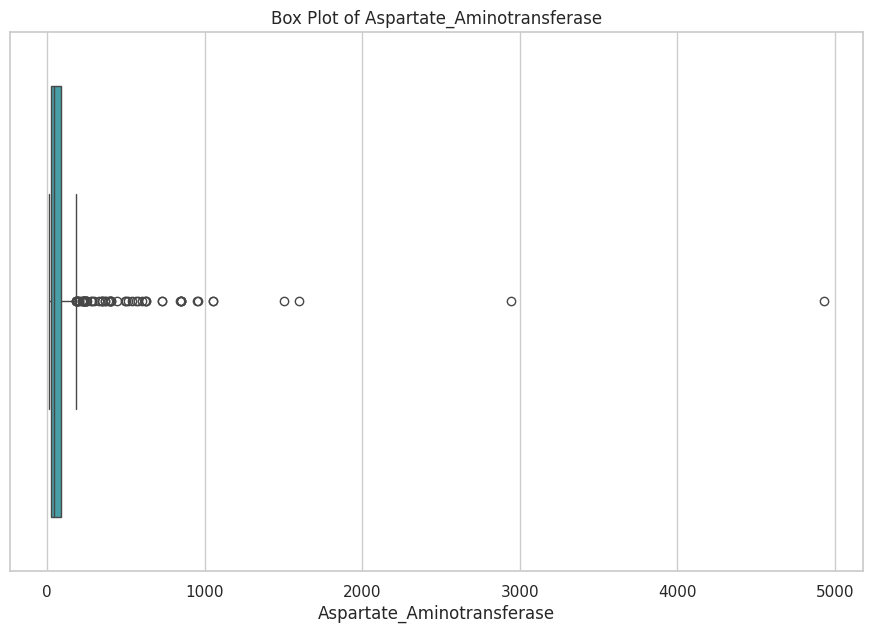

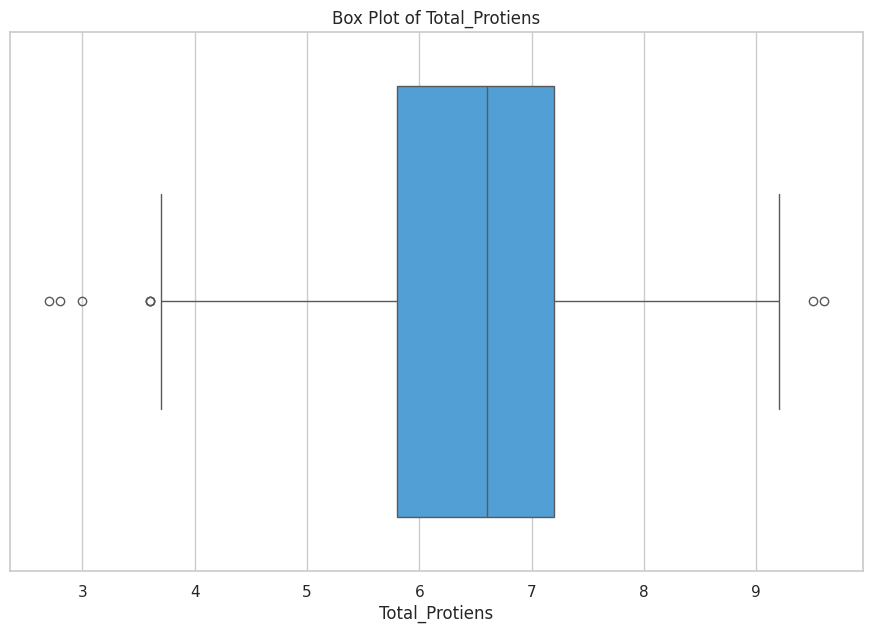

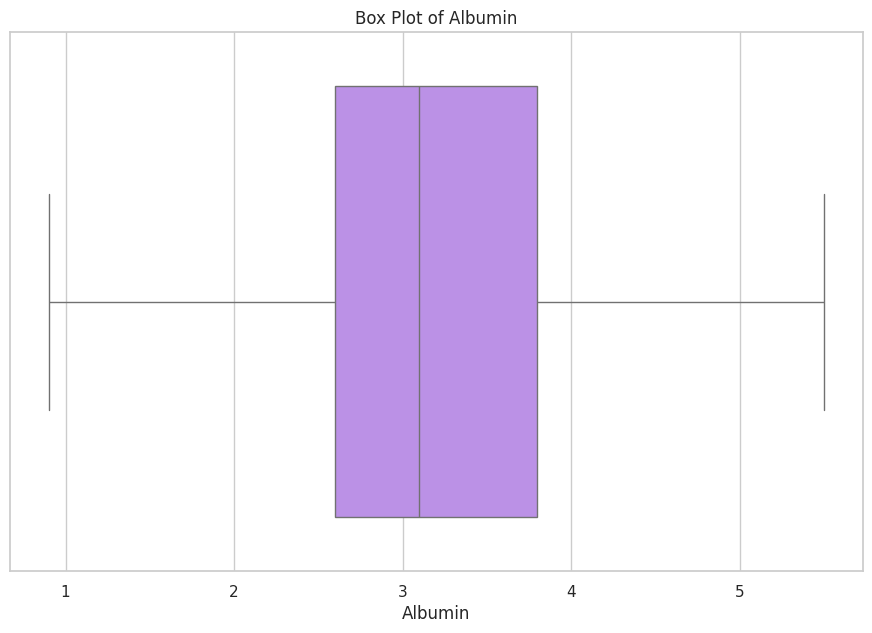

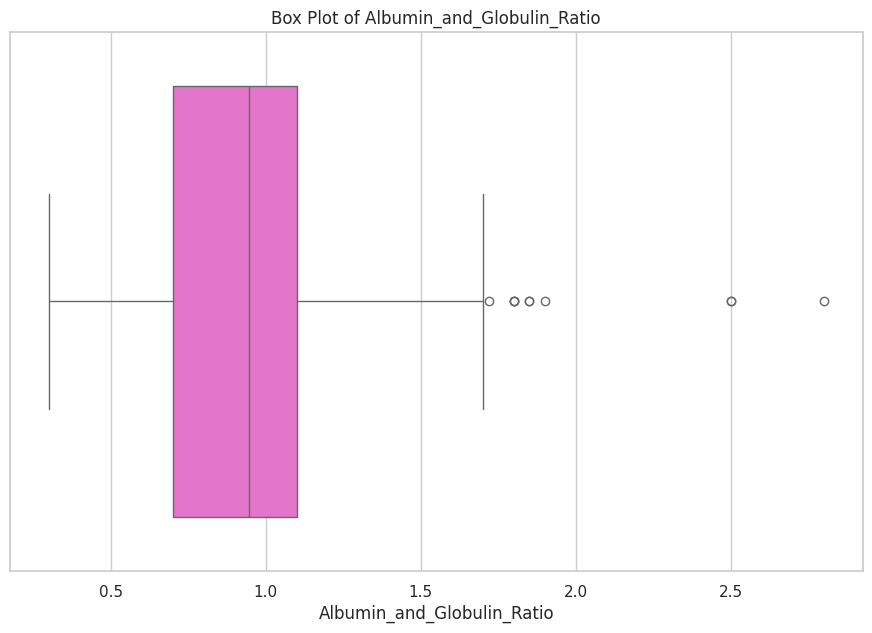

In [13]:
# Box Plots for Continuous Columns
palette = sns.color_palette("husl", len(continuous_vars_g23ai2100))
for colums, color_randoum in zip(continuous_vars_g23ai2100, palette):
    plt.figure(figsize=(11, 7))
    sns.boxplot(x=df[colums], color=color_randoum)
    plt.title(f'Box Plot of {colums}')
    plt.show()

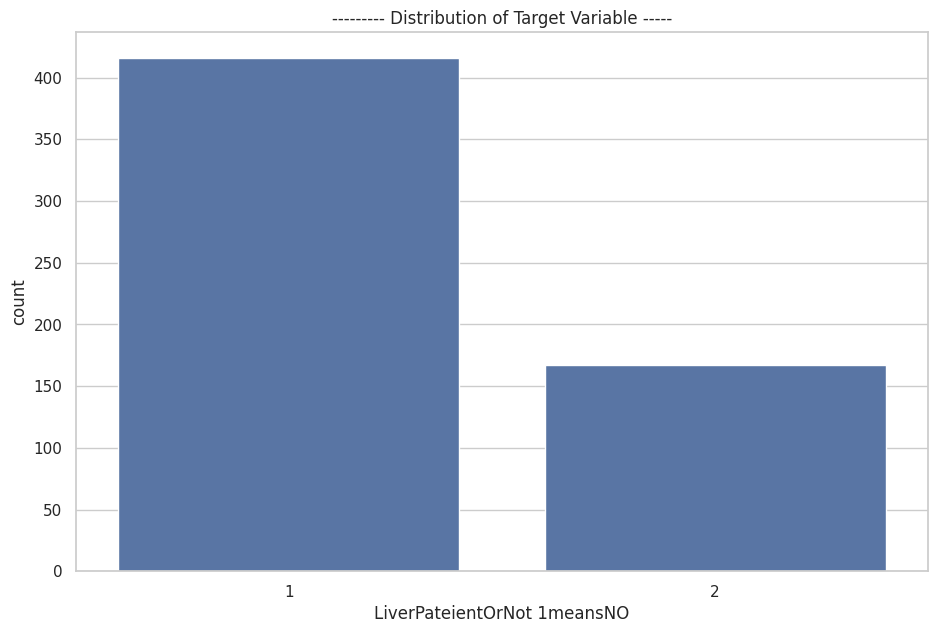

In [14]:
# Target Distribution
plt.figure(figsize=(11, 7))
sns.countplot(x=df['LiverPateientOrNot 1meansNO'])
plt.title('--------- Distribution of Target Variable -----')
plt.show()

Q5 Perform different feature selection algorithms including pairwise correlation


In [15]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

output_var_cloum = 'LiverPateientOrNot 1meansNO'

# SelectKBest for discrete columns
X_discrete_g23ai2100 = df[discrete_vars_g23ai2100]
y_g23ai2100 = df[output_var_cloum]
selector_discrete_g23ai2100 = SelectKBest(score_func=chi2, k='all')
selector_discrete_g23ai2100.fit(X_discrete_g23ai2100, y_g23ai2100)
print("Discrete Feature Scores:", selector_discrete_g23ai2100.scores_)

# SelectKBest for continuous columns
X_continuous_g23ai2100 = df[continuous_vars_g23ai2100]
selector_continuous_g23ai2100 = SelectKBest(score_func=f_classif, k='all')
selector_continuous_g23ai2100.fit(X_continuous_g23ai2100, y_g23ai2100)
print("Continuous Feature Scores:", selector_continuous_g23ai2100.scores_)

# Pairwise correlation
correlation_matrix = df.corr()
print(correlation_matrix)

Discrete Feature Scores: [ 0.96451837 92.62933333]
Continuous Feature Scores: [11.1714293  29.75267932 37.94378977 20.56733999 15.74457342 13.12464455
  0.57976987 15.53743097 15.72213621]
                                  Age    Gender  Total_Bilirubin  \
Age                          1.000000  0.056560         0.009429   
Gender                       0.056560  1.000000         0.088078   
Total_Bilirubin              0.009429  0.088078         1.000000   
Direct_Bilirubin             0.005871  0.100762         0.873330   
Alkaline_Phosphotase         0.080538 -0.027462         0.205442   
Alamine_Aminotransferase    -0.087203  0.081393         0.213265   
Aspartate_Aminotransferase  -0.023767  0.077748         0.236509   
Total_Protiens              -0.177874 -0.086323        -0.010337   
Albumin                     -0.265924 -0.093799        -0.221874   
Albumin_and_Globulin_Ratio  -0.216089 -0.003404        -0.205840   
LiverPateientOrNot 1meansNO -0.137351 -0.082416        -0.22071

*italicised text*
Q6 Use optuna to fine tune decision tree, and random forest classification algorithms to find the best hyperparameter combination


In [16]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00


In [17]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data
output_variable_g23ai2100 = 'LiverPateientOrNot 1meansNO'
X_g23ai2100 = df.drop(output_variable_g23ai2100, axis=1)
y_g23ai2100 = df[output_variable_g23ai2100]
X_train, X_test, y_train, y_test = train_test_split(X_g23ai2100, y_g23ai2100, test_size=0.2, random_state=42)

# Define the objective function for Decision Tree
def objective_dt(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }
    model = DecisionTreeClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Optimize Decision Tree
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=50)
print("Best Decision Tree Params:", study_dt.best_params)

# Define the objective function for Random Forest
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Optimize Random Forest
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)
print("Best Random Forest Params:", study_rf.best_params)


[I 2024-12-15 13:30:39,203] A new study created in memory with name: no-name-3c6b0c6b-564c-46ef-afd7-f9f5b779da1f
[I 2024-12-15 13:30:39,215] Trial 0 finished with value: 0.6581196581196581 and parameters: {'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.6581196581196581.
[I 2024-12-15 13:30:39,225] Trial 1 finished with value: 0.6752136752136753 and parameters: {'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 15}. Best is trial 1 with value: 0.6752136752136753.
[I 2024-12-15 13:30:39,233] Trial 2 finished with value: 0.7435897435897436 and parameters: {'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 18}. Best is trial 2 with value: 0.7435897435897436.
[I 2024-12-15 13:30:39,243] Trial 3 finished with value: 0.6752136752136753 and parameters: {'max_depth': 18, 'min_samples_split': 20, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.7435897435897436.
[I 2024-12-15 13:30:39,252] Trial 4 finished with value:

Best Decision Tree Params: {'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 20}


[I 2024-12-15 13:30:41,351] Trial 0 finished with value: 0.717948717948718 and parameters: {'n_estimators': 445, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.717948717948718.
[I 2024-12-15 13:30:42,403] Trial 1 finished with value: 0.7264957264957265 and parameters: {'n_estimators': 386, 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.7264957264957265.
[I 2024-12-15 13:30:42,848] Trial 2 finished with value: 0.717948717948718 and parameters: {'n_estimators': 150, 'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.7264957264957265.
[I 2024-12-15 13:30:43,772] Trial 3 finished with value: 0.7435897435897436 and parameters: {'n_estimators': 360, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.7435897435897436.
[I 2024-12-15 13:30:44,676] Trial 4 finished with value: 0.7008547008547008 and parameters: {'

Best Random Forest Params: {'n_estimators': 458, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 9}


Q7 Do different feature engineering steps of PCA and one hot encoding and then do classification and compare without feature engineering and with feature engineering

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


onehot_encoder = OneHotEncoder()
pca = PCA(n_components=5) # PCA - continuous columns

continuous_vars = [col for col in continuous_vars_g23ai2100 if col in X_train.columns]  # Ensure that continuous_vars and discrete_vars only contain columns present in X_train
discrete_vars = [col for col in discrete_vars_g23ai2100 if col in X_train.columns]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', pca, continuous_vars),
        ('cat', onehot_encoder, discrete_vars)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(**study_dt.best_params))]) # Create a pipeline


pipeline.fit(X_train, y_train)

# Predict/ evaluate
y_pred = pipeline.predict(X_test)
print("Accuracy(Feature Engineering):", accuracy_score(y_test, y_pred))

Accuracy(Feature Engineering): 0.6923076923076923



Q8 Use MLFlow to run different runs of the same algorithms Decision Tree , and Random Forest and capture the input hyperparameters and output metrics of the same



In [19]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 623.0/623.0 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.8 MB/s eta 0:00:00


In [20]:
import mlflow
import mlflow.sklearn


with mlflow.start_run():
    mlflow.log_params(study_dt.best_params)
    mlflow.sklearn.log_model(pipeline, "decision_tree_model")
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))


with mlflow.start_run():
    mlflow.log_params(study_rf.best_params)
    pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', RandomForestClassifier(**study_rf.best_params))])
    pipeline_rf.fit(X_train, y_train)
    y_pred_rf = pipeline_rf.predict(X_test)
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_rf))
    mlflow.sklearn.log_model(pipeline_rf, "random_forest_model")


2024/12/15 13:49:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/15 13:49:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [22]:
import mlflow
from mlflow.tracking import MlflowClient


ml_client = MlflowClient()

experiment_name = "pateints-assignment"
experiment = ml_client.get_experiment_by_name(experiment_name)
experiment_id = experiment.experiment_id

# Fetch all runs for the experiment
runs = ml_client.search_runs(
    experiment_ids=[experiment_id],
    filter_string="",
    run_view_type=mlflow.entities.ViewType.ACTIVE_ONLY,
    max_results=100
)

# Display runs
for run in runs:
    print("Run ID:", run.info.run_id)
    print("Parameters:", run.data.params)
    print("Metrics:", run.data.metrics)
    print("Artifacts:", ml_client.list_artifacts(run.info.run_id))
    print("-" * 50)


AttributeError: 'NoneType' object has no attribute 'experiment_id'